In [1]:
# import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# unique values in species 
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
# lets impute sepal_length using mean strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sepal_length_imputed = imputer.fit_transform(iris['sepal_length'].values[..., None])

In [28]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sepal_length_imputed, iris['species'], test_size=.3)

In [5]:
# lets impute species using most-frequent strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
species_imputed = imputer.fit_transform(iris['species'].values[..., None])

In [10]:
# lets encode the imputed species
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
species_encoded = encoder.fit_transform(species_imputed).toarray()

In [20]:
# import the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = classifier.predict(x_test)

C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

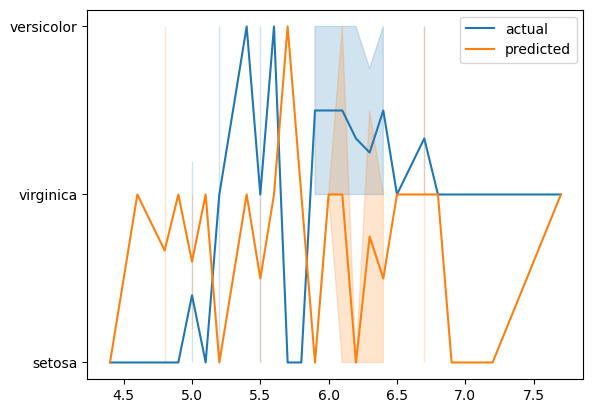

In [34]:
sns.lineplot(x = x_test.ravel(), y = y_test.ravel(), label = 'actual')
sns.lineplot(x = x_test.ravel(), y = y_pred, label = 'predicted')
plt.show()